Vilzuallizing a single b-scan from the original 99_R_2_1_Segm.xls file

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# For reading .xls files, install xlrd otherwise comment out the import
import xlrd

In [7]:
file_path = '/home/suraj/Git/SCR-Progression/sample-oct-annotations.xlsx'

In [11]:
#load the xlsx file
data = pd.read_excel(file_path, engine='openpyxl')
#for the orioginal .xls file format
#data = xlrd.open_workbook('/home/suraj/Git/SCR-Progression/99_R_2_1_Segm.xls')

In [19]:
# Filter for the B-scan with ImageID 18019
#bscan_data = data[data['ImageID'] == 18019]

# Define the layers (update with actual layer names if different)
layers = ['ILM', 'NFL', 'GCL', 'IPL', 'INL', 'OPL', 'ELM', 'PR1', 'PR2', 'RPE', 'BM']
layer_rows = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32] #row indices for each layer, 0 based indices in pandad as compared to excel


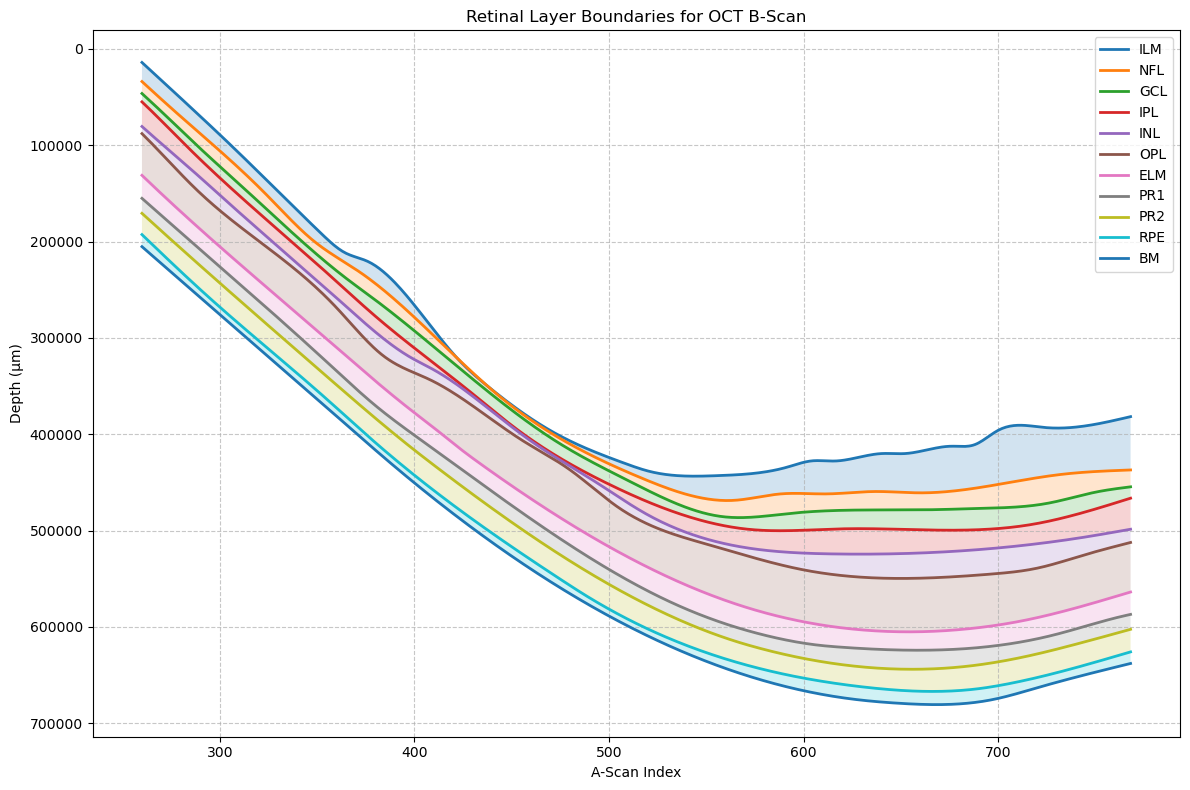

In [20]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot each layer and fill between consecutive layers
previous_y = None
for i, (layer, row_idx) in enumerate(zip(layers, layer_rows)):
    # Extract the row for the current layer
    layer_data = data.iloc[row_idx - 1, :] # Adjust for 0-based indexing
    # Get valid data (columns 260 to 768, 0-based index 259 to 767)
    x = range(260, 769) # A-scan indices
    y = layer_data[259:768].values # Depth values (columns 260 to 768)
    # Convert to numeric, handling any non-numeric values
    y = pd.to_numeric(y, errors='coerce')
    # Plot the layer
    plt.plot(x, y, label=layer, linewidth=2)
    # Fill between this layer and the previous one
    if previous_y is not None:
        plt.fill_between(x, previous_y, y, alpha=0.2)
    previous_y = y

# Customize the plot
plt.xlabel('A-Scan Index')
plt.ylabel('Depth (µm)')
plt.title('Retinal Layer Boundaries for OCT B-Scan')
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis so deeper layers appear lower
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the Excel file
file_path = "sample-oct-annotations.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1", header=None)

# Define the layers based on provided data
layers = ['ILM', 'NFL', 'GCL', 'RPE', 'BM']
layer_rows = [2, 5, 7, 29, 32] # Row indices for each layer (1-based indexing in Excel, 0-based in pandas)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot each layer and fill between consecutive layers
previous_y = None
for i, (layer, row_idx) in enumerate(zip(layers, layer_rows)):
# Extract the row for the current layer
layer_data = data.iloc[row_idx - 1, :] # Adjust for 0-based indexing
# Get valid data (columns 260 to 768, 0-based index 259 to 767)
x = range(260, 769) # A-scan indices
y = layer_data[259:768].values # Depth values (columns 260 to 768)
# Convert to numeric, handling any non-numeric values
y = pd.to_numeric(y, errors='coerce')
# Plot the layer
plt.plot(x, y, label=layer, linewidth=2)
# Fill between this layer and the previous one
if previous_y is not None:
plt.fill_between(x, previous_y, y, alpha=0.2)
previous_y = y

# Customize the plot
plt.xlabel('A-Scan Index')
plt.ylabel('Depth (µm)')
plt.title('Retinal Layer Boundaries for OCT B-Scan')
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis so deeper layers appear lower
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
